<a href="https://colab.research.google.com/github/KeremAyseli/pythonYapayZeka/blob/main/ML/MakineOgrenmesiOdev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ülkelere göre aşılama çalışmaları(COVID-19 World Vaccination Progress)

##Verilerin Okunması


In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
import sklearn.metrics as mt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
drive.mount('/content/gdrive/')
dosyaYolu="gdrive/MyDrive/ColabNotebooks/country_vaccinations.csv"
dosya=pd.read_csv(dosyaYolu)



Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


## Boş verilerin temizlenmesi ve yerine ortanca değerlerinin atanması

> Tabloda bulunan boş verilerin,hesaplamayı yanlış çıkarmaması için yerlerine,o sütunda bulnan verilerin ortanca değerleri veya ortalama değeri atanabilir.



In [40]:
#fillna metoduyla boş olan hücrelere gelecek değerleri belirliyoruz.
dosya.total_vaccinations=dosya.total_vaccinations.fillna(dosya.total_vaccinations.median())

dosya.people_vaccinated=dosya.people_vaccinated.fillna(dosya.people_vaccinated.median())

dosya.people_fully_vaccinated=dosya.people_fully_vaccinated.fillna(dosya.people_fully_vaccinated.median())

dosya.daily_vaccinations_raw=dosya.daily_vaccinations_raw.fillna(dosya.daily_vaccinations_raw.median())

dosya.daily_vaccinations=dosya.daily_vaccinations.fillna(dosya.daily_vaccinations.median())

dosya.total_vaccinations=dosya.total_vaccinations.fillna(dosya.total_vaccinations.median())

dosya.total_vaccinations_per_hundred=dosya.total_vaccinations_per_hundred.fillna(dosya.total_vaccinations_per_hundred.median())

dosya.people_vaccinated_per_hundred=dosya.people_vaccinated_per_hundred.fillna(dosya.people_vaccinated_per_hundred.median())

dosya.people_fully_vaccinated_per_hundred=dosya.people_fully_vaccinated_per_hundred.fillna(dosya.people_fully_vaccinated_per_hundred.median())

dosya.daily_vaccinations_per_million=dosya.daily_vaccinations_per_million.fillna(dosya.daily_vaccinations_per_million.median())

#Sayısal değer olmayan verilerin,sayısal değere dönüştürülmesi

> Bağzı değerlerle işlem yapmamız gerekebilir fakat bu değerler metin olduğu için verilerin işlenmesi zor olur,bu sebebten dolayı metin değer olarak girilmiş verilere etiket bir sayı atanır.
 
**örnek**
```
Afganistan Iso kodu=AFG=1
Türkiye Iso kodu=TUR=2
```
Burada normalde TUR şeklinde olan ifadeye 2 değerini atadık.




In [3]:
#encoder sınıfının tanımlanması.
label = LabelEncoder()
#metinsel değere sahip olan sütunların LabelEncoder kullanarak sayısal değere çevrilmesi.
#Bu işlemi metin değerleri de hesaplamaya katabilmek için yapıyoruz.

dosya.iso_code=label.fit_transform(dosya.iso_code)
dosya.vaccines=label.fit_transform(dosya.vaccines)
dosya.source_name=label.fit_transform(dosya.source_name)


#Verileri seçmek


> Çok fazla kayıt olduğu için işlemler zaman aşımına uğrayabiliyordu,bu sebepeten dolayı sadece Türkiyenin verileriyle çalışmak istedim.Bunu yapabilmek için **DataFrame** sınıfını kullanıyoruz ve istediğimiz sütunları seçtikten sonra loc metoduyla şartımızı belirtip yeni verilerimizi seçiyoruz.



In [158]:
#Sutünların seçilmesi.
veriler = pd.DataFrame(dosya,columns=['country','daily_vaccinations','daily_vaccinations_per_million','date','people_vaccinated','total_vaccinations','people_fully_vaccinated'])
#Verileri seçmek için loc metodunun kullanılması.
veriler2=veriler.loc[veriler['country']=='Turkey']


#Verilerin eğitilmesi 


> Verilerimizi eğitmek için **train_test_split** metodunu kullanıyoruz.



In [143]:
x_train,x_test,y_train,y_test=train_test_split(veriler2['people_fully_vaccinated'],veriler2['people_vaccinated'],test_size=1,random_state=15)

#Verilerin ölçeklenmesi.
sc=StandardScaler()

#değerlerin yeniden boyutlandırılması.
x_train=x_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,1)
#modelin eğitilme aşaması.
x_train=sc.fit_transform(x_train)
#eğitilen modelde transform metodu ile uygulama yapılması.
x_test=sc.transform(x_test)

logr=LogisticRegression(random_state=1)
#X'den,y'nin öğrenilmesi.
logr.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
print(y_train)

9951     6582239.0
9917      291053.0
9911      291053.0
9992    10359390.0
9972     7991510.0
           ...    
9936      291053.0
9908      291053.0
9913      291053.0
9920      291053.0
9980     8195554.0
Name: people_vaccinated, Length: 86, dtype: float64


##Eğitilmiş modelde tahmini verilerin oluşturulması

In [145]:
#predict metoduyla tahmini veriler oluşturuyoruz.
y_pred=logr.predict(x_test)
print(y_pred)
print(y_test)


[291053.]
9933    291053.0
Name: people_vaccinated, dtype: float64


##Modelin doğruluk puanın çıkarılması

In [146]:
#accuracy_score methodu kullanılarak doğruluk puanı çıkartılıyor.
acuracy=accuracy_score(y_true=y_test,y_pred=y_pred)
print("Doğruluk: % {:10.2f}".format(acuracy*100))

Doğruluk: %     100.00


##Modelin görselleştirilmesi

Text(0, 0.5, 'aşılaması devam eden insanlar')

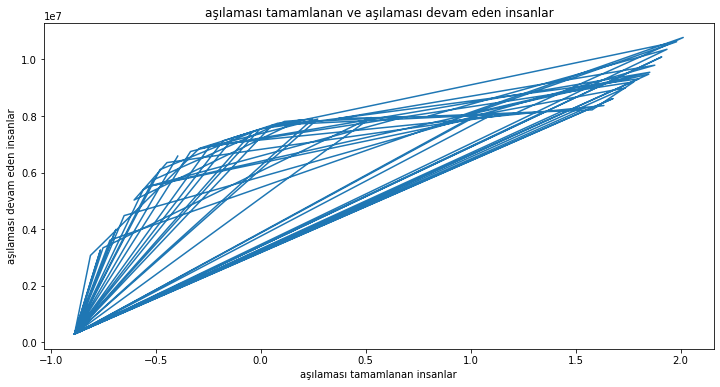

In [157]:
#Grafiğin boyutunun ayarlanması.
plt.figure(figsize=(12,6))
#Grafiğe x ve y değerlerinin verilmesi.
plt.plot(x_train,y_train)
#Grafiğin başlığının ayarlanması.
plt.title("aşılaması tamamlanan ve aşılaması devam eden insanlar")
#Grafiğin x sütununa verilen isim.
plt.xlabel("aşılaması tamamlanan insanlar")
#Grafiğin y sütununa verilen isim.
plt.ylabel("aşılaması devam eden insanlar")

#Dosyanın başlıklarıyla beraber okunması

In [153]:
dosya.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,142907.5,15177.0,5949.0,0.00,0.000,1.68,1395.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,342879.5,291053.0,142907.5,15177.0,1367.0,4.66,3.735,1.68,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,342879.5,291053.0,142907.5,15177.0,1367.0,4.66,3.735,1.68,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,342879.5,291053.0,142907.5,15177.0,1367.0,4.66,3.735,1.68,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,342879.5,291053.0,142907.5,15177.0,1367.0,4.66,3.735,1.68,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
